<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        MACHINE LEARNING HOMEWORK
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> ML Exam session July 10th 2024</b> <br>
    Sabrina Pervin Abu - 252278 <br>
    </div>
    </td>
    <td width="100px">
        </a>
    </td>
</tr>
</table>

## *1* 

Perform a preliminary analysis on the data. For instance, but not limted to, 
- visualize samples, 
- identify if features (i.e., codon frequencies) are correlated, 
- determine which are most correlated with the target classes
- inspect the distribution of samples among classes. 

Using clustering, 
- study if there are structures in the data that allow samples from different classes (both DNA type and Kingdom) to be easily identified. 
- Compare the performance of different clustering algorithms and distance measures using the metrics presented during the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

import seaborn as sns

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import scipy
from sklearn.preprocessing import LabelEncoder

# Cleaning and preparation

In [2]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of each dataframe to understand their structure
train_data.head(), test_data.head()
# Check for missing values in the train dataset
missing_train = train_data.isnull().sum()
#pd.isna(train_data).any()
print(f'colonne con dati mancanti in test_data: {missing_train}')
# Check for missing values in the test dataset
missing_test = test_data.isnull().sum()
#pd.isna(train_data).any()
print(f'colonne con dati mancanti in test_data: {missing_test}')

# List of columns in the training set
train_columns = set(train_data.columns)
# List of columns in the test set
test_columns = set(test_data.columns)
# Find the difference between the two sets of columns to identify missing features
missing_in_test = train_columns - test_columns
missing_in_test
print(f'Colonne mancanti in test_data: {missing_in_test}')

# Encode Kingdom labels 
le = LabelEncoder()
train_data['Kingdom_encoded'] = le.fit_transform(train_data['Kingdom'])  #we add the column Kingdom_encoded 
test_data['Kingdom_encoded'] = le.fit_transform(test_data['Kingdom']) 
# Visualizza la mappatura tra etichette originali e valori numerici
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

colonne con dati mancanti in test_data: Unnamed: 0    0
Kingdom       0
DNAtype       0
SpeciesID     0
Ncodons       0
             ..
GAA           0
GAG           0
UAA           0
UAG           0
UGA           0
Length: 70, dtype: int64
colonne con dati mancanti in test_data: Unnamed: 0    0
Kingdom       0
DNAtype       0
SpeciesID     0
Ncodons       0
             ..
GAA           0
GAG           0
UAA           0
UAG           0
UGA           0
Length: 69, dtype: int64
Colonne mancanti in test_data: {'AGA'}
Label Mapping: {'arc': 0, 'bct': 1, 'inv': 2, 'mam': 3, 'phg': 4, 'plm': 5, 'pln': 6, 'pri': 7, 'rod': 8, 'vrl': 9, 'vrt': 10}


**There are no missing values in the training dataset. The test dataset also has no missing values, except for the AGA codon frequency column, which is entirely missing.**

# Exploratory Data Analysis 
to visualize the distribution of codon frequencies and the distribution of samples across different classes (Kingdom and DNAtype. 

In [3]:
train_noAGA = train_data.drop(columns=['AGA'])
train_noAGA.head()

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_encoded
0,872,vrl,0,207343,6686,Bovine foamy virus,0.01541,0.00927,0.01720,0.01825,...,0.00643,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030,9
1,9865,inv,0,7629,10060,Anthocidaris crassispina,0.01213,0.02515,0.00268,0.01352,...,0.00268,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050,2
2,3190,bct,0,320850,14031,Staphylococcus phage X2,0.02580,0.01618,0.03606,0.01354,...,0.00114,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086,1
3,3674,bct,0,1397,39839,Bacillus circulans,0.00128,0.02141,0.01225,0.01649,...,0.01177,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063,1
4,11372,vrt,1,50790,5112,mitochondrion Dascyllus trimaculatus,0.03169,0.01780,0.03893,0.00000,...,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465,10


In [4]:
train_data.head()

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_encoded
0,872,vrl,0,207343,6686,Bovine foamy virus,0.01541,0.00927,0.01720,0.01825,...,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030,9
1,9865,inv,0,7629,10060,Anthocidaris crassispina,0.01213,0.02515,0.00268,0.01352,...,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050,2
2,3190,bct,0,320850,14031,Staphylococcus phage X2,0.02580,0.01618,0.03606,0.01354,...,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086,1
3,3674,bct,0,1397,39839,Bacillus circulans,0.00128,0.02141,0.01225,0.01649,...,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063,1
4,11372,vrt,1,50790,5112,mitochondrion Dascyllus trimaculatus,0.03169,0.01780,0.03893,0.00000,...,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465,10


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

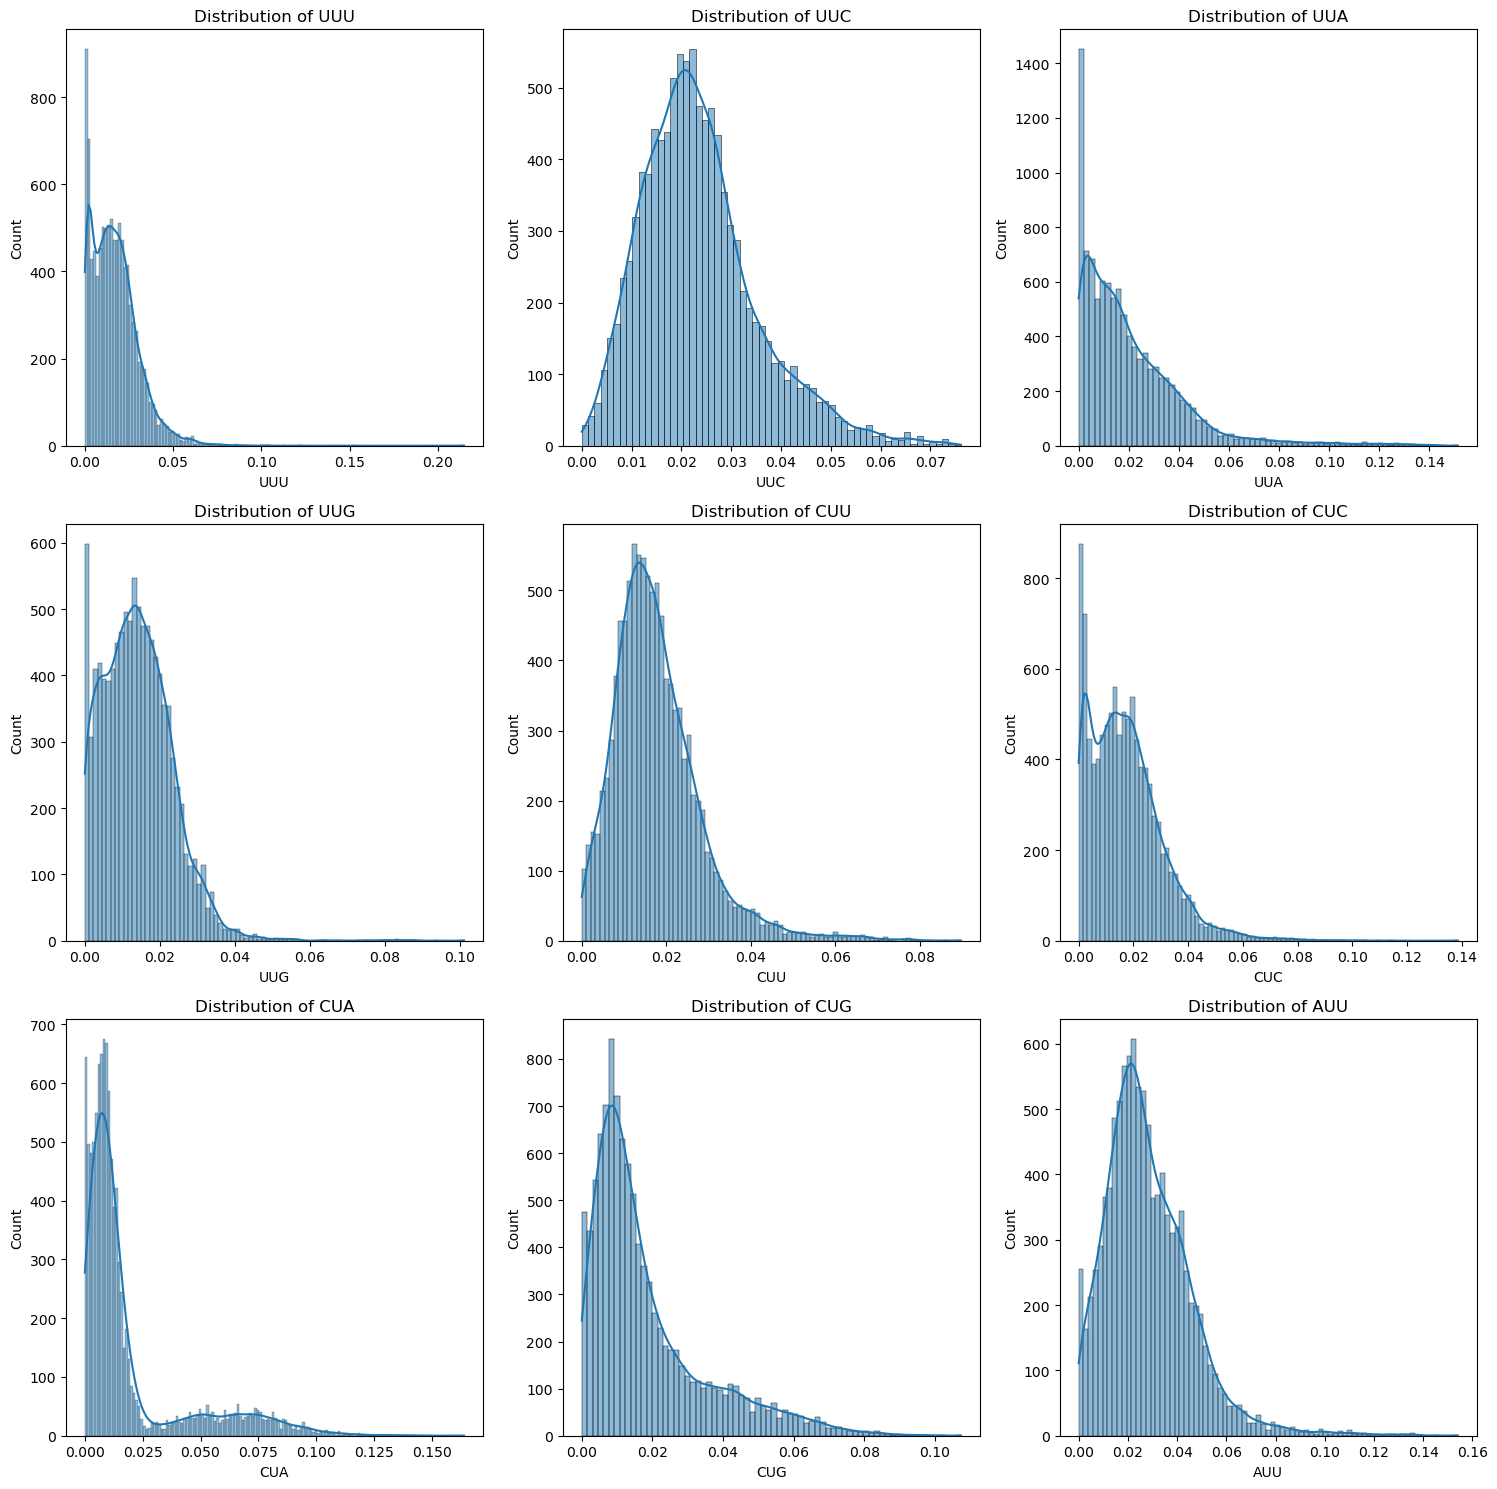

In [5]:
# Plotting the distribution of the first 9 codons' frequencies for visualization - over all the +10k samples 

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
codons = ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU']

for codon, ax in zip(codons, axs.flatten()):
    sns.histplot(train_data[codon], kde=True, ax=ax)
    ax.set_title(f'Distribution of {codon}')
    
plt.tight_layout()
plt.show()

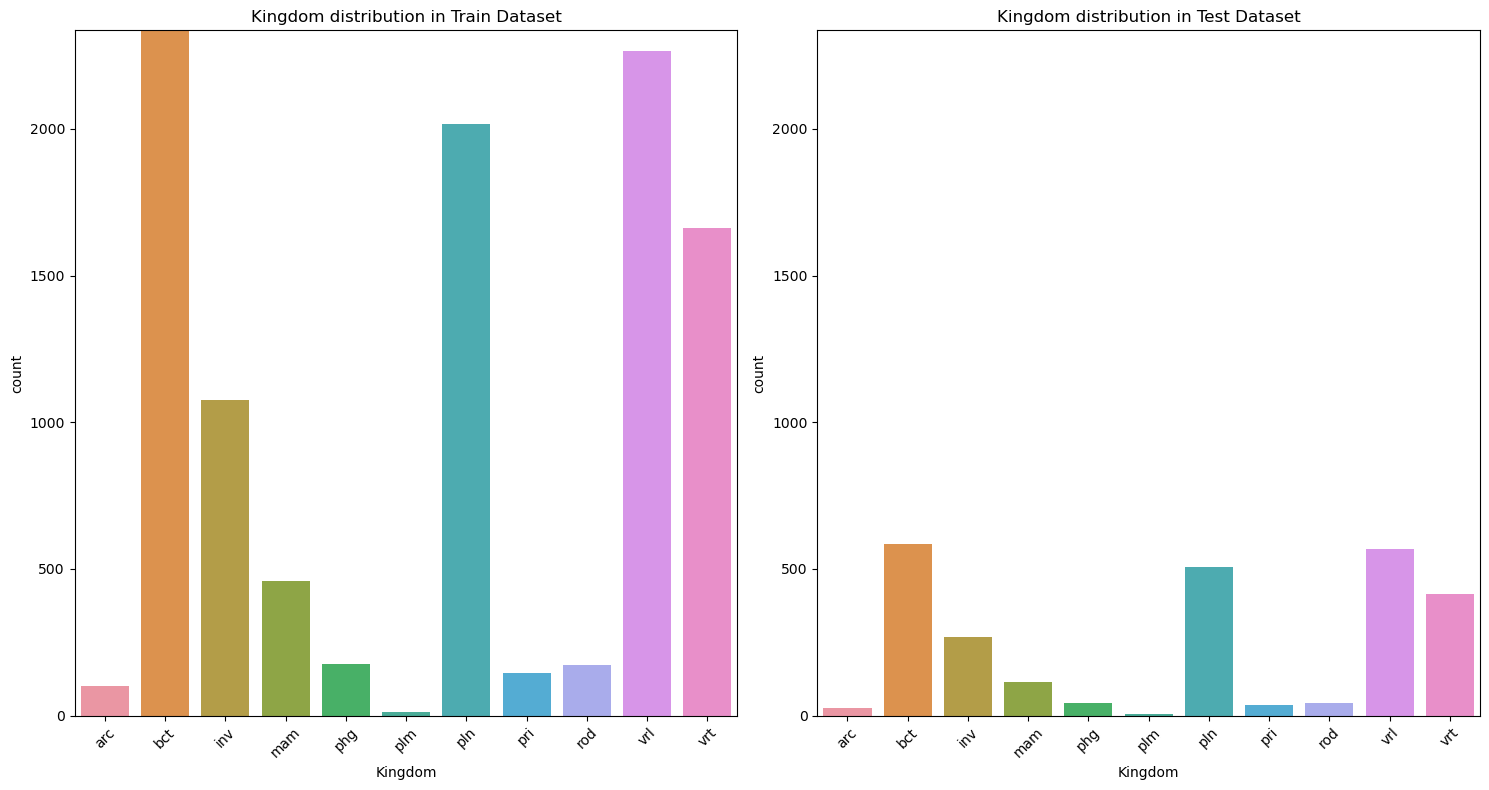

In [6]:
# Plotting the distribution of samples across different classes for Kingdom and DNAtype
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

all_categories = sorted(set(train_data['Kingdom'].unique()).union(set(test_data['Kingdom'].unique())))
max_count = max(train_data['Kingdom'].value_counts().max(), test_data['Kingdom'].value_counts().max())

# Kingdom class distribution
sns.countplot(x='Kingdom', data=train_data, ax=ax[0], order=all_categories)
ax[0].set_title('Kingdom distribution in Train Dataset')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_ylim(0, max_count)

# DNAtype class distribution
sns.countplot(x='Kingdom', data=test_data, ax=ax[1], order= all_categories)
ax[1].set_title('Kingdom distribution in Test Dataset')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylim(0, max_count)

plt.tight_layout()
plt.show()

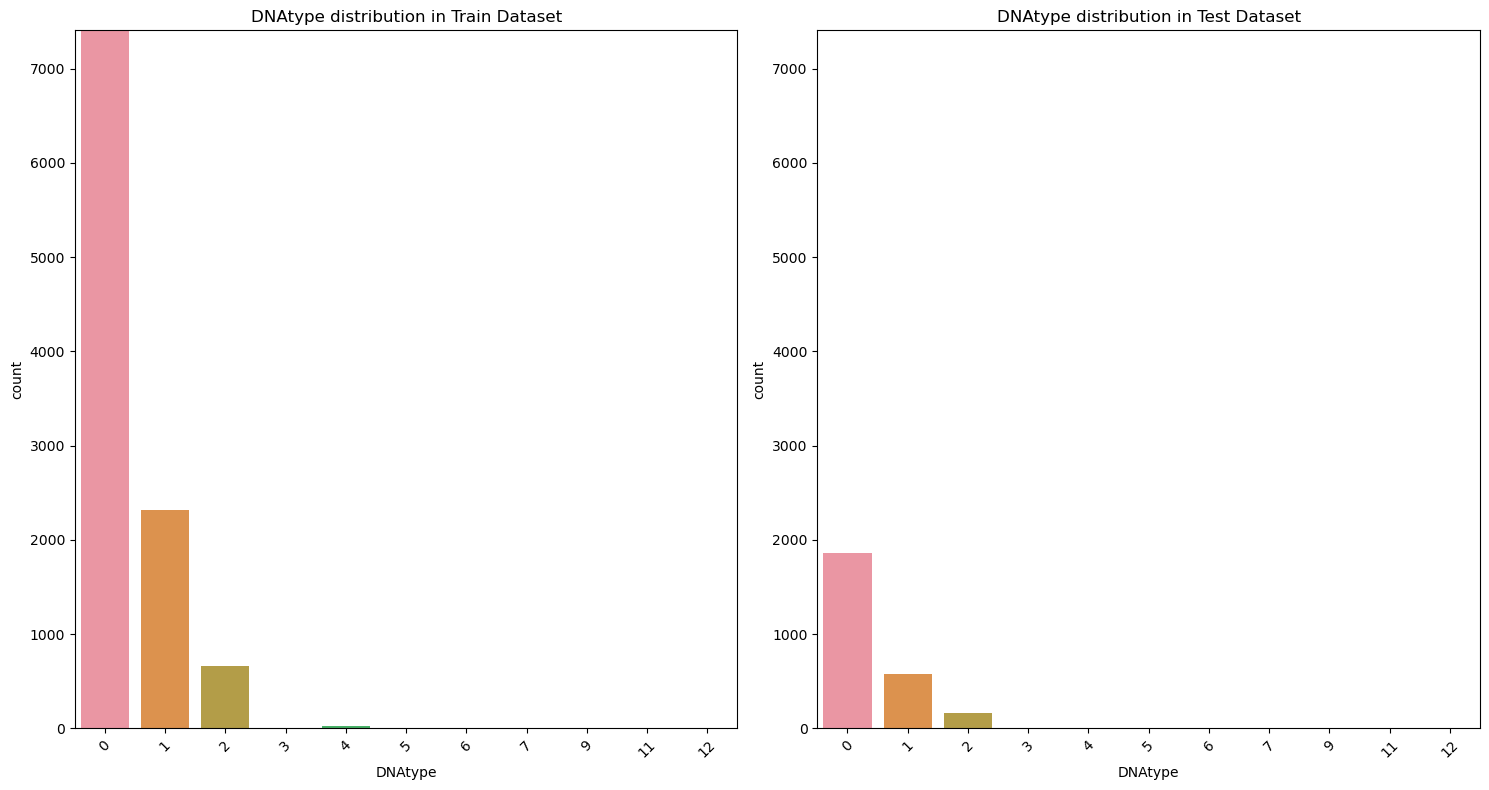

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
all_categories = sorted(set(train_data['DNAtype'].unique()).union(set(test_data['DNAtype'].unique())))
max_count = max(train_data['DNAtype'].value_counts().max(), test_data['DNAtype'].value_counts().max())

# Kingdom class distribution
sns.countplot(x='DNAtype', data=train_data, ax=ax[0], order=all_categories)
ax[0].set_title('DNAtype distribution in Train Dataset')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_ylim(0, max_count)

# DNAtype class distribution
sns.countplot(x='DNAtype', data=test_data, ax=ax[1], order= all_categories)
ax[1].set_title('DNAtype distribution in Test Dataset')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylim(0, max_count)

plt.tight_layout()
plt.show()

Calculate the CORRELATION MATRIX to identify relationships between codon frequencies and the target classes (Kingdom and DNAtype)
help us understand which codon frequencies are most correlated with the target classes 

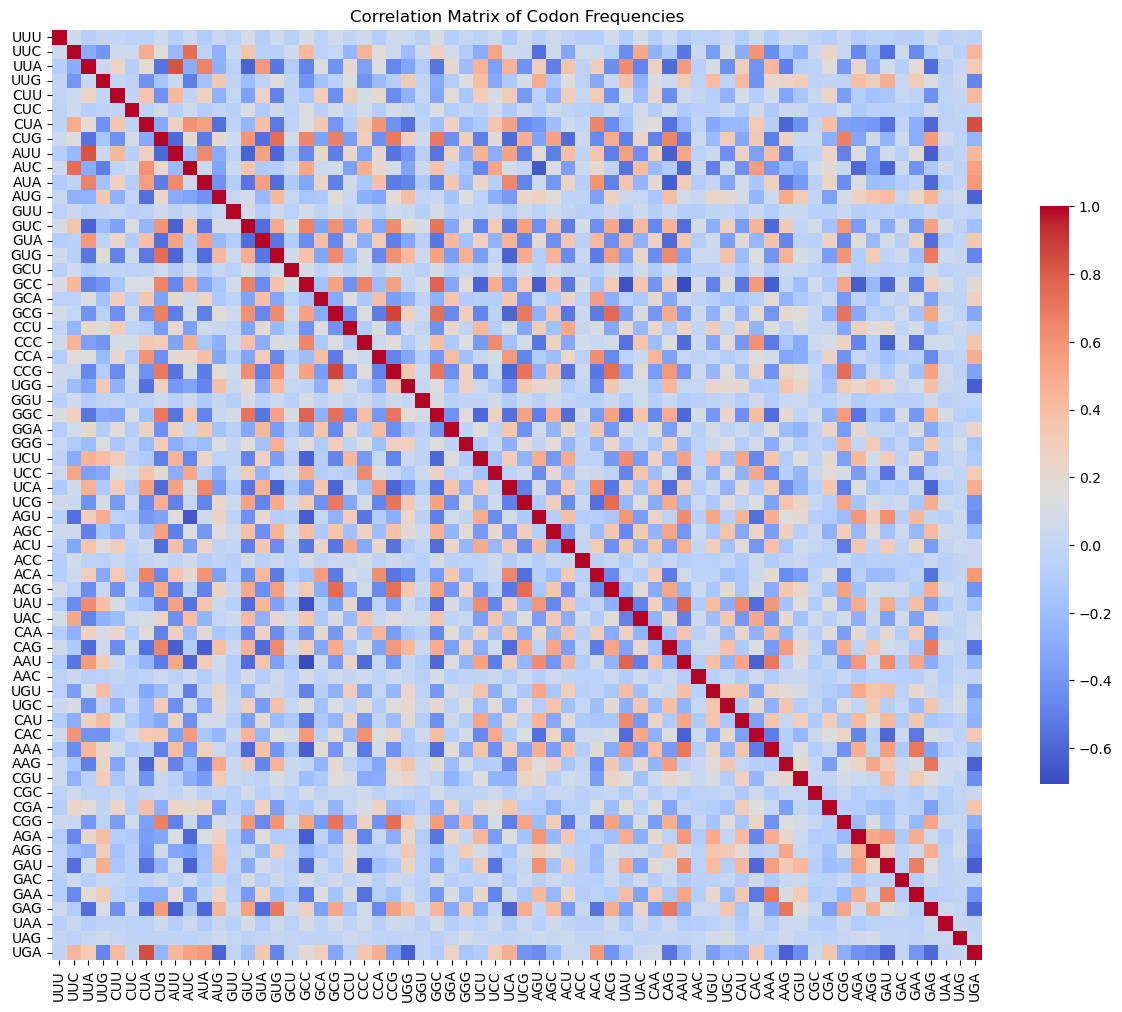

In [8]:
# Calculate the correlation matrix for codon frequencies  
train_codons= train_data.iloc[:,6:-1]   #-1 because the last column is Kingdom_encoded 
correlation_matrix = train_codons.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True,cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Codon Frequencies')
plt.show()

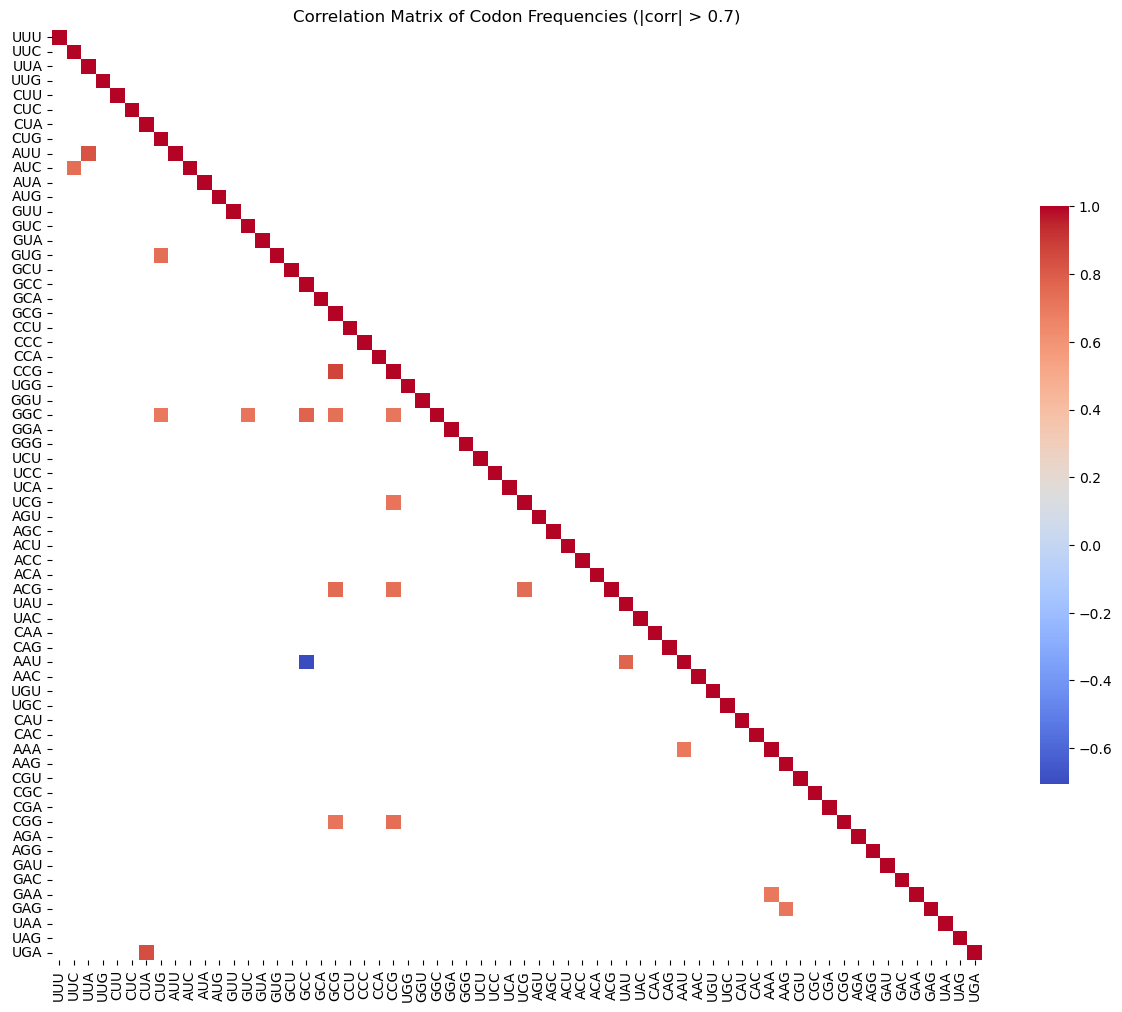

In [9]:
filtered_corr_matrix = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool), k=1)

# Plot the filtered correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(filtered_corr_matrix, mask=mask, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Codon Frequencies (|corr| > 0.7)')
plt.show()


Correlation analysis to see WHICH CODON frequencies are MOST CORRELATED WITH TARGET CLASSES (Kingdom and DNAtype): Spearman correlation coefficient is used for this purpose.

In [10]:
#preparing dataset to test correlation - AGA included 
train_king = train_data.drop(columns=['Unnamed: 0', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'Kingdom'])
train_DNA = train_data.drop(columns=['Unnamed: 0', 'Kingdom', 'SpeciesID', 'Ncodons', 'SpeciesName', 'Kingdom_encoded'])

train_king.head()


,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_encoded
0,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,0.02094,0.01885,0.01226,...,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030,9
1,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,0.02992,0.01352,0.03370,...,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050,2
2,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,0.00278,0.03250,0.01768,...,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086,1
3,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,0.02834,0.02508,0.02611,...,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063,1
4,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,0.01408,0.03873,0.03873,...,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465,10


In [11]:
train_DNA.head()

,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,0.02094,0.01885,...,0.00643,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,0,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,0.02992,0.01352,...,0.00268,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,0,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,0.00278,0.03250,...,0.00114,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,0,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,0.02834,0.02508,...,0.01177,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,1,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,0.01408,0.03873,...,0.00000,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465


In [12]:
# Calculate Spearman correlation for Kingdom
correlation_kingdom = train_king.corr(method='spearman')['Kingdom_encoded'].sort_values(ascending=False)

# Calculate Spearman correlation for DNAtype
correlation_dnatype = train_DNA.corr(method='spearman')['DNAtype'].sort_values(ascending=False)

In [13]:
correlation_kingdom.head(15) #most correlated codons with the kingdom

Kingdom_encoded    1.000000
CCA                0.479736
CUA                0.461542
ACA                0.436004
UCA                0.359289
UCC                0.339833
AUA                0.327174
CCC                0.323385
CUU                0.272814
CCU                0.247411
CGA                0.246892
CAC                0.246275
ACU                0.245048
GGA                0.200100
GCA                0.189356
Name: Kingdom_encoded, dtype: float64

In [14]:
correlation_dnatype.head(15)  #most correlated codons with the DNAtype

DNAtype    1.000000
CUA        0.648477
AUA        0.588741
AUU        0.554856
UUA        0.550864
UGA        0.518495
CGA        0.510708
GUA        0.481053
UCA        0.474642
CUU        0.461383
ACA        0.308510
GGA        0.257141
UUC        0.256867
CCA        0.245128
CAA        0.209743
Name: DNAtype, dtype: float64

# Clustering

Let's perform K-Means CLUSTERING and evaluate the clusters using silhouette scores

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

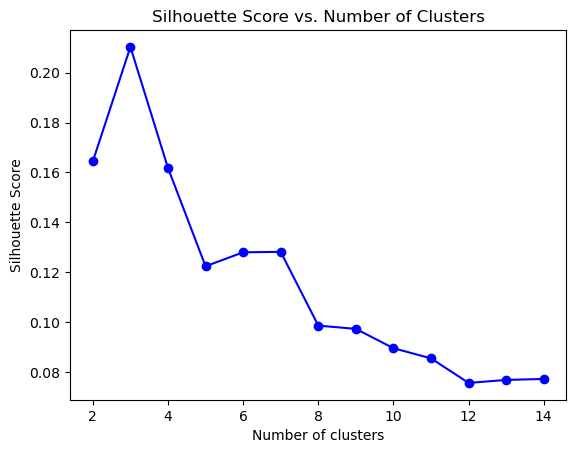

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Prepare the data for clustering (using only codon frequencies)
codon_columns = train_data.columns[6:-1]      #Columns containing codon frequencies
X = train_data[codon_columns].values

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    labels = kmeans.labels_
    score = silhouette_score(X_normalized, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the number of clusters is: 3
the Silhouette Score of the K-Means clustering equals to: 0.22706307381841048


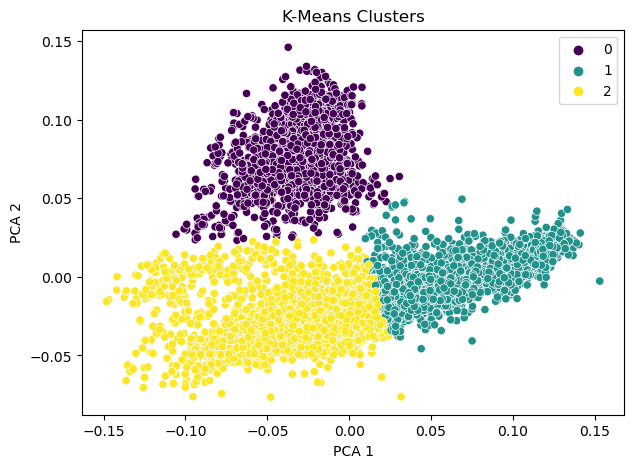

In [16]:
#best score is with k=3

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare the data for clustering (using only codon frequencies)
codon_columns = train_data.columns[6:-1]  # Columns containing codon frequencies
X = train_data[codon_columns].values

# Perform K-Means clustering (11 clusters per gli 11 kingdoms)
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Calculate the silhouette score - è STATO AFFRONTATO DURANTE IL CORSO? ???
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)

print(f'the number of clusters is: {n_clusters}')
print(f'the Silhouette Score of the K-Means clustering equals to: {kmeans_silhouette_score}')

#VISUALIZE THE CLUSTERS 

# Reduce dimensions for visualization using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="viridis", legend="full")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("K-Means Clusters")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the number of clusters is: 11
the Silhouette Score of the K-Means clustering equals to: 0.07730538114971884


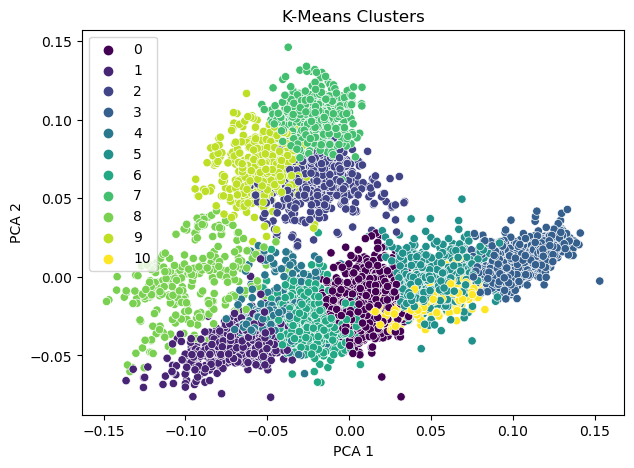

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-Means clustering (11 clusters per gli 11 kingdoms)
n_clusters=11
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Calculate the silhouette score - è STATO AFFRONTATO DURANTE IL CORSO? ???
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)

print(f'the number of clusters is: {n_clusters}')
print(f'the Silhouette Score of the K-Means clustering equals to: {kmeans_silhouette_score}')

#VISUALIZE THE CLUSTERS 

# Reduce dimensions for visualization using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="viridis", legend="full")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("K-Means Clusters")
plt.show()


HIERARCHICAL CLUSTERING is a method of cluster analysis which seeks to build a hierarchy of clusters

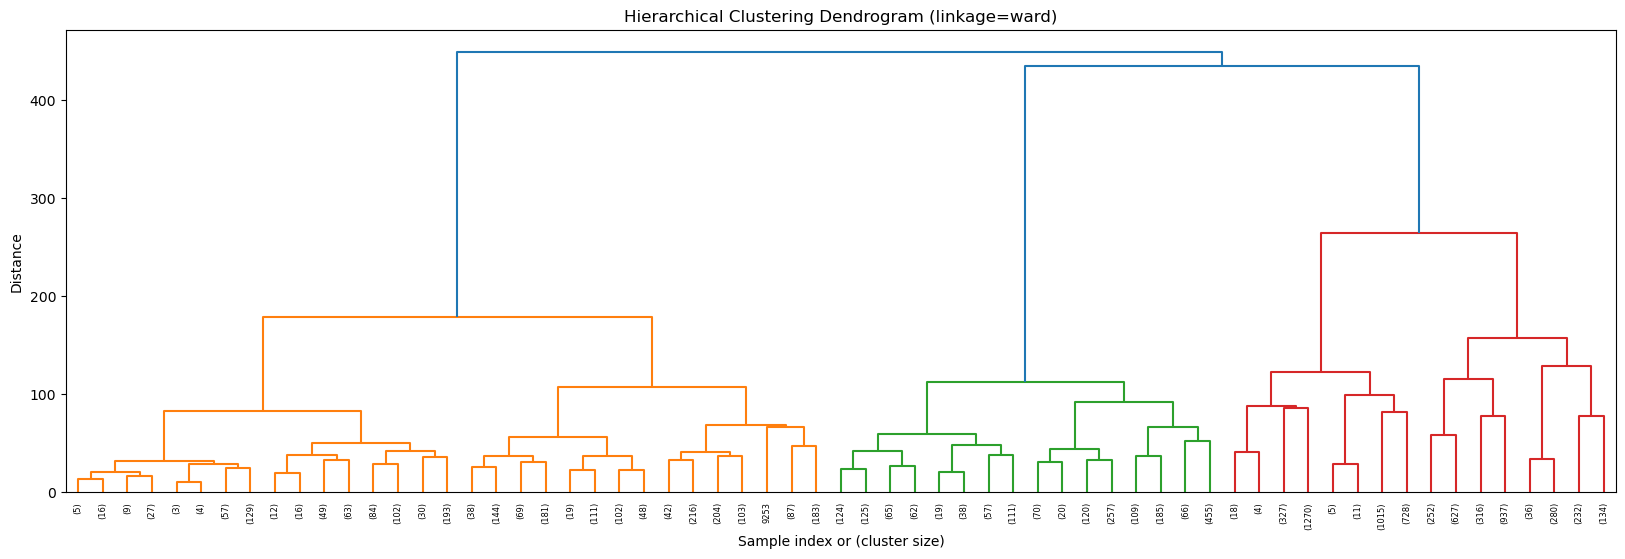

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Agglomerative Clustering Silhouette Score: 0.057381405325342486


In [18]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform hierarchical clustering
# Linkage matrix
Z = linkage(X_normalized, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (linkage=ward)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering - EUCLIDEAN DISTANCE 
agg_clustering = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(X_normalized)

# Calculate the silhouette score
agg_silhouette_score = silhouette_score(X_normalized, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette_score}")

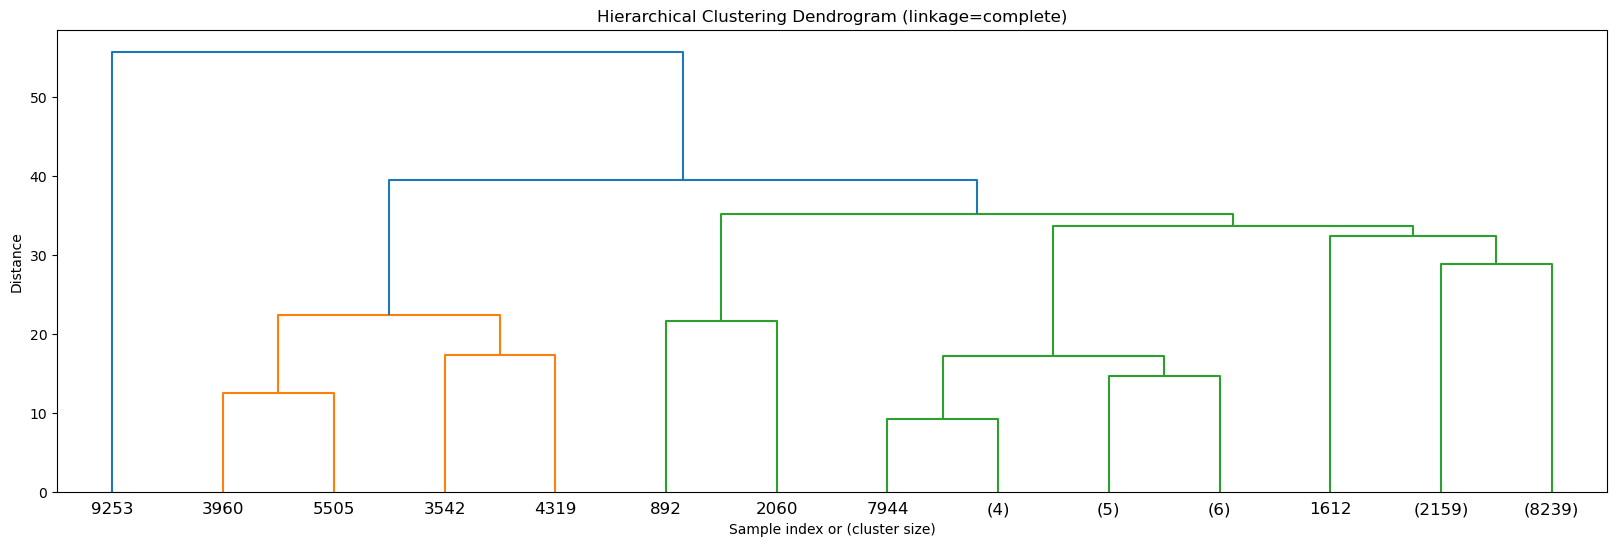

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Agglomerative Clustering Silhouette Score: 0.07681449734725924


In [19]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform hierarchical clustering
# Linkage matrix
Z = linkage(X_normalized, method='complete')

# Plot the dendrogram
plt.figure(figsize=(20, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (linkage=complete)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering - EUCLIDEAN DISTANCE 
agg_clustering = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='complete')
agg_labels = agg_clustering.fit_predict(X_normalized)

# Calculate the silhouette score
agg_silhouette_score = silhouette_score(X_normalized, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette_score}")

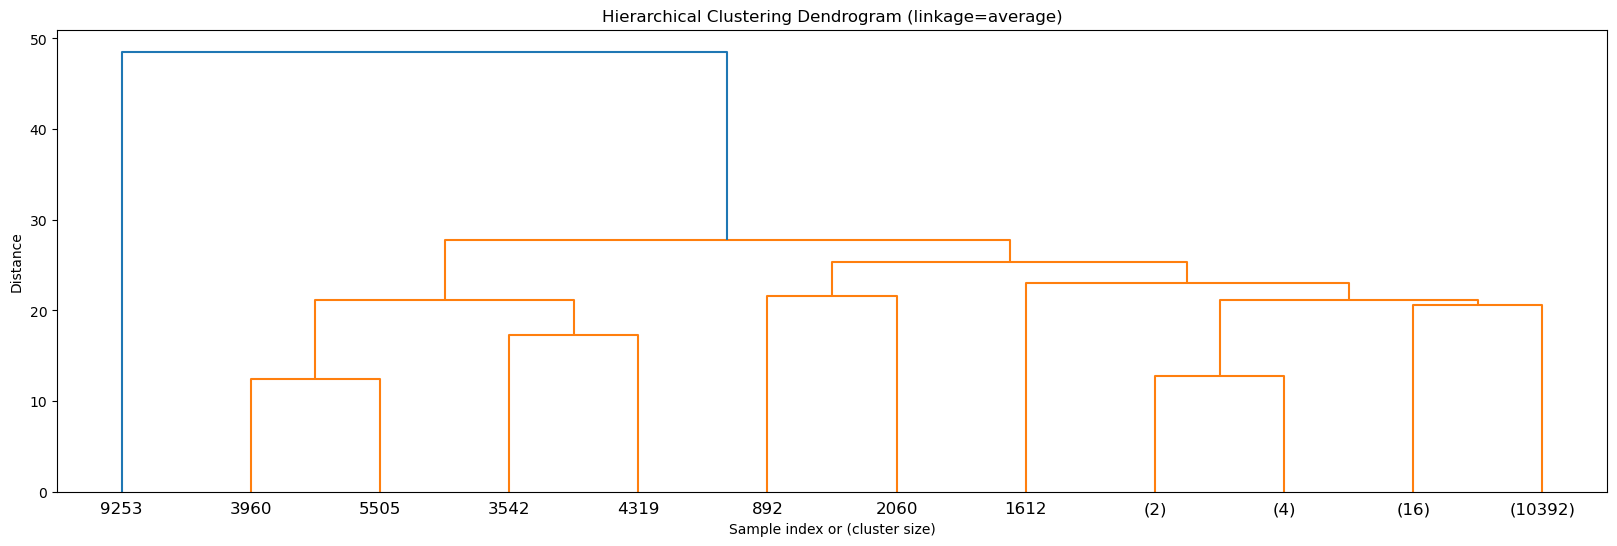

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Agglomerative Clustering Silhouette Score: 0.40947876548807666


In [20]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform hierarchical clustering
# Linkage matrix
Z = linkage(X_normalized, method='average')

# Plot the dendrogram
plt.figure(figsize=(20, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (linkage=average)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering - EUCLIDEAN DISTANCE 
agg_clustering = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='average')
agg_labels = agg_clustering.fit_predict(X_normalized)

# Calculate the silhouette score
agg_silhouette_score = silhouette_score(X_normalized, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette_score}")

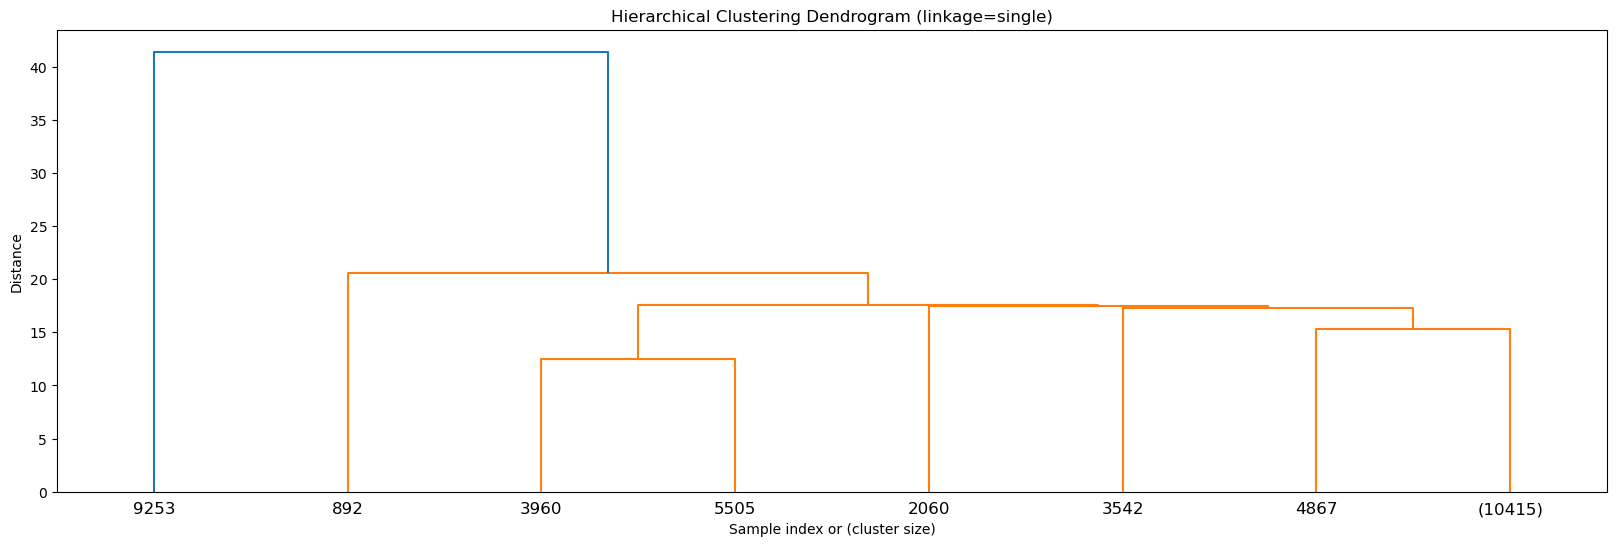

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Agglomerative Clustering Silhouette Score: 0.37437707559765504


In [21]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform hierarchical clustering
# Linkage matrix
Z = linkage(X_normalized, method='single')

# Plot the dendrogram
plt.figure(figsize=(20, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (linkage=single)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering - EUCLIDEAN DISTANCE 
agg_clustering = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='single')
agg_labels = agg_clustering.fit_predict(X_normalized)

# Calculate the silhouette score
agg_silhouette_score = silhouette_score(X_normalized, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette_score}")

## *2* 

- Perform classification to classify organisms into the 11 Kingdom classes. Perform features selection, compare different algorithms and identify the one that works the best on this dataset. 
- Finally, test the performance of the best algorithm on the provided test set.

SAMPLE SELECTION: da +10ksamples a 1000 

# Classification


In [22]:
from sklearn.model_selection import train_test_split

#RANDOM SAMPLE RESIZING 
sample_size = 1000  
train_sampled = train_noAGA.sample(n=sample_size, random_state=42)

# Split the data into features and target
X = train_sampled.drop(columns=['Unnamed: 0', 'Kingdom', 'DNAtype', 'SpeciesID', 'SpeciesName', 'Ncodons', 'Kingdom_encoded'])     
y = train_sampled['Kingdom_encoded']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the training data into train and validation sets  
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Feature Selection** 

In [23]:
#Feature Selection from Tree-Based Models
from sklearn.ensemble import RandomForestClassifier
importances = RandomForestClassifier(random_state=42).fit(X_train, y_train).feature_importances_

# select best features
indices = np.argsort(importances)[-20:]  
X_train_selected = X_train[:, indices]
X_val_selected = X_val[:, indices]

# visualize selected features
selected_features = X.columns[indices]
print(f"Selected features: {selected_features}")

Selected features: Index(['AGC', 'AUC', 'UAU', 'CUG', 'CAA', 'CCA', 'AUA', 'GAA', 'ACA', 'GAG',
       'GGA', 'CUU', 'AAG', 'UGA', 'GCG', 'GAU', 'UGC', 'CUA', 'AGG', 'UGU'],
      dtype='object')


**Confronto dei Modelli** 

In [24]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# defining the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=5000000, solver='lbfgs', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# train and assess classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# select best classifier
best_classifier_name = max(results, key=results.get)
best_classifier = classifiers[best_classifier_name]
print(f"BEST CLASSIFIER: {best_classifier_name} with Accuracy: {results[best_classifier_name]:.4f}")

Logistic Regression Accuracy: 0.7150
Decision Tree Accuracy: 0.5450
Random Forest Accuracy: 0.7050
LDA Accuracy: 0.7100
SVM Accuracy: 0.7100
K-Nearest Neighbors Accuracy: 0.6750
BEST CLASSIFIER: Logistic Regression with Accuracy: 0.7150


## *3* 

We want to recover from the data loss of the AGA frequency on test samples. 
- Train a regressor which can predict the value of the AGA feature given the remaining ones. 
- Compare different regression algorithms for this task. 
- Since AGA features are missing in test samples, use only the training data for this step and make use of robust evaluation techniques to compare algorithms.

# Regression model selection 

In [25]:
train_data.head() #con AGA

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_encoded
0,872,vrl,0,207343,6686,Bovine foamy virus,0.01541,0.00927,0.01720,0.01825,...,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030,9
1,9865,inv,0,7629,10060,Anthocidaris crassispina,0.01213,0.02515,0.00268,0.01352,...,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050,2
2,3190,bct,0,320850,14031,Staphylococcus phage X2,0.02580,0.01618,0.03606,0.01354,...,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086,1
3,3674,bct,0,1397,39839,Bacillus circulans,0.00128,0.02141,0.01225,0.01649,...,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063,1
4,11372,vrt,1,50790,5112,mitochondrion Dascyllus trimaculatus,0.03169,0.01780,0.03893,0.00000,...,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465,10


In [26]:
train_noAGA.head()

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_encoded
0,872,vrl,0,207343,6686,Bovine foamy virus,0.01541,0.00927,0.01720,0.01825,...,0.00643,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030,9
1,9865,inv,0,7629,10060,Anthocidaris crassispina,0.01213,0.02515,0.00268,0.01352,...,0.00268,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050,2
2,3190,bct,0,320850,14031,Staphylococcus phage X2,0.02580,0.01618,0.03606,0.01354,...,0.00114,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086,1
3,3674,bct,0,1397,39839,Bacillus circulans,0.00128,0.02141,0.01225,0.01649,...,0.01177,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063,1
4,11372,vrt,1,50790,5112,mitochondrion Dascyllus trimaculatus,0.03169,0.01780,0.03893,0.00000,...,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465,10


In [27]:
test_data.head()

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_encoded
0,5114,bct,0,360105,568103,Campylobacter curvus 525.92,0.00959,0.01359,0.01584,0.01312,...,0.00121,0.00709,0.02980,0.04135,0.02608,0.03877,0.01183,0.00061,0.00117,1
1,8747,inv,0,135724,6295,Pimpla hypochondriaca,0.01223,0.03447,0.00508,0.01811,...,0.00524,0.01001,0.02621,0.03368,0.02303,0.03066,0.03479,0.00064,0.00064,2
2,6220,pln,0,120297,3451,Fusarium oxysporum f. sp. niveum,0.01014,0.03014,0.00145,0.01275,...,0.00058,0.00174,0.02753,0.02695,0.00637,0.01826,0.03216,0.00116,0.00029,6
3,6144,pln,0,105351,14867,Aspergillus awamori,0.03551,0.02892,0.00155,0.01117,...,0.00451,0.00356,0.02865,0.02401,0.01594,0.03390,0.01628,0.00108,0.00047,6
4,6783,pln,2,280810,1143,chloroplast Cryptothallus mirabilis,0.01662,0.01400,0.02800,0.03412,...,0.00175,0.01837,0.03062,0.02362,0.03150,0.01575,0.02625,0.00087,0.00525,6


In [28]:
#preparing feature_columns train_features train_target test_features 
train_target = train_data['AGA']

train_features = train_noAGA.drop(columns=['Unnamed: 0', 'SpeciesName', 'Kingdom', 'DNAtype', 'Ncodons','SpeciesID','Kingdom_encoded'])
train_features.head()

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGA,CGG,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,0.02094,0.01885,0.01226,...,0.00853,0.00643,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,0.02992,0.01352,0.03370,...,0.00378,0.00268,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,0.00278,0.03250,0.01768,...,0.00570,0.00114,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,0.02834,0.02508,0.02611,...,0.00359,0.01177,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,0.01408,0.03873,0.03873,...,0.01056,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge Regressor":Ridge(alpha=1.0),
    "Lasso Regressor":Lasso(alpha=0.1)
}
# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, train_features, train_target, cv=6, scoring='neg_mean_squared_error')
         #scoring='neg_mean_squared_error' specifies that the negative mean squared error is used as the evaluation metric. 
         #The negative sign is used because cross_val_score aims to maximize the score, while we want to minimize the mean squared error.
    results[name] = np.mean(-scores)  #np.mean(-scores) calculates the mean of the negated scores (which gives us the mean squared error).

# Display the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Mean Squared Error']) #converting the results dictionary into a pandas DataFrame for easier visualization
results_df.sort_values(by='Mean Squared Error', ascending=True)

,Model,Mean Squared Error
2,Linear Regression,1.488530e-09
1,Random Forest Regressor,1.415274e-05
3,Ridge Regressor,2.568704e-05
0,Decision Tree Regressor,3.072177e-05
4,Lasso Regressor,7.392694e-05


In [30]:
best_PredictionModel = results_df.iloc[2,0]
print(f'the best prediction model is the {best_PredictionModel}')

the best prediction model is the Linear Regression


## *4* 

- Use the regression model trained at the previous step to recover the AGA codon frequency, by predicting the AGA value of each test sample. 
- Determine if the test performance of the best model found at step (2.) improves if the AGA frequency values are also used for prediction. 

# Regression

In [31]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model on the entire training data
linear_regressor = LinearRegression()
linear_regressor.fit(train_features, train_target)

test_features = test_data.drop(columns=['Unnamed: 0', 'SpeciesName', 'Kingdom', 'DNAtype', 'Ncodons','SpeciesID','Kingdom_encoded'])

# Predict the AGA feature for the test data
aga_predict_LR = linear_regressor.predict(test_features)

test_data_LR = test_data

# Add the predictions to the test dataset
test_data_LR['AGA'] = aga_predict_LR

# Display the first few rows of the updated test dataset
test_data_LR.head()

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_encoded,AGA
0,5114,bct,0,360105,568103,Campylobacter curvus 525.92,0.00959,0.01359,0.01584,0.01312,...,0.00709,0.02980,0.04135,0.02608,0.03877,0.01183,0.00061,0.00117,1,0.009610
1,8747,inv,0,135724,6295,Pimpla hypochondriaca,0.01223,0.03447,0.00508,0.01811,...,0.01001,0.02621,0.03368,0.02303,0.03066,0.03479,0.00064,0.00064,2,0.009323
2,6220,pln,0,120297,3451,Fusarium oxysporum f. sp. niveum,0.01014,0.03014,0.00145,0.01275,...,0.00174,0.02753,0.02695,0.00637,0.01826,0.03216,0.00116,0.00029,6,0.004344
3,6144,pln,0,105351,14867,Aspergillus awamori,0.03551,0.02892,0.00155,0.01117,...,0.00356,0.02865,0.02401,0.01594,0.03390,0.01628,0.00108,0.00047,6,0.002401
4,6783,pln,2,280810,1143,chloroplast Cryptothallus mirabilis,0.01662,0.01400,0.02800,0.03412,...,0.01837,0.03062,0.02362,0.03150,0.01575,0.02625,0.00087,0.00525,6,0.017552


In [32]:
# Train the Random Forest Regressor model on the entire training data ALTHOUGH IT DOESNT HAVE THE BEST MSE
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(train_features, train_target)

# Predict the AGA feature for the test data
aga_predict_rf = rf_regressor.predict(test_features)

# Add the predictions to the test dataset
test_data_RF = test_data
test_data_RF['AGA'] = aga_predict_rf

# Display the first few rows of the updated test dataset
test_data_RF.head()

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_encoded,AGA
0,5114,bct,0,360105,568103,Campylobacter curvus 525.92,0.00959,0.01359,0.01584,0.01312,...,0.00709,0.02980,0.04135,0.02608,0.03877,0.01183,0.00061,0.00117,1,0.010138
1,8747,inv,0,135724,6295,Pimpla hypochondriaca,0.01223,0.03447,0.00508,0.01811,...,0.01001,0.02621,0.03368,0.02303,0.03066,0.03479,0.00064,0.00064,2,0.010687
2,6220,pln,0,120297,3451,Fusarium oxysporum f. sp. niveum,0.01014,0.03014,0.00145,0.01275,...,0.00174,0.02753,0.02695,0.00637,0.01826,0.03216,0.00116,0.00029,6,0.004410
3,6144,pln,0,105351,14867,Aspergillus awamori,0.03551,0.02892,0.00155,0.01117,...,0.00356,0.02865,0.02401,0.01594,0.03390,0.01628,0.00108,0.00047,6,0.004185
4,6783,pln,2,280810,1143,chloroplast Cryptothallus mirabilis,0.01662,0.01400,0.02800,0.03412,...,0.01837,0.03062,0.02362,0.03150,0.01575,0.02625,0.00087,0.00525,6,0.019366


# Classification after regression 

In [33]:
train_features_AGA = train_data.drop(columns=['Unnamed: 0', 'SpeciesName', 'Kingdom', 'DNAtype', 'Ncodons','SpeciesID','Kingdom_encoded'])
train_features_AGA.head()

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,0.02094,0.01885,0.01226,...,0.00643,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,0.02992,0.01352,0.03370,...,0.00268,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,0.00278,0.03250,0.01768,...,0.00114,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,0.02834,0.02508,0.02611,...,0.01177,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,0.01408,0.03873,0.03873,...,0.00000,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465


In [34]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = train_features_AGA     
y = train_noAGA['Kingdom_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the training data into train and validation sets  
X_train_aga, X_val_aga, y_train_aga, y_val_aga = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression(max_iter=5000000, solver='lbfgs', random_state=42)
logistic_regressor.fit(X_train_aga, y_train_aga)
y_pred_aga = logistic_regressor.predict(X_val_aga)
accuracy = accuracy_score(y_val_aga, y_pred_aga)


print(f"Best Classifier before prediction of AGA was the Logistic Regression, with Accuracy of 0.7150")
print(f"the Accuracy of classification after prediction of AGA is: {accuracy:.4f}")

Best Classifier before prediction of AGA was the Logistic Regression, with Accuracy of 0.7150
the Accuracy of classification after prediction of AGA is: 0.8388


**The accuracy of the Logistic Regression model improves if the AGA frequency values are also used for prediction.**